In [ ]:
import pandas as pd
import random

In [ ]:
l=[]

In [ ]:
for i in range(10000):
  p=random.randint(1,6)

  l.append(p)

In [ ]:
len(l)

10000

In [ ]:
l[:5]

[4, 4, 6, 6, 5]

In [ ]:
pd.Series(l)

0       4
1       4
2       6
3       6
4       5
       ..
9995    6
9996    4
9997    5
9998    4
9999    5
Length: 10000, dtype: int64

In [ ]:
pd.Series(l).value_counts()

2    1724
4    1694
6    1668
1    1658
5    1640
3    1616
dtype: int64

In [ ]:
pd.Series(l).value_counts().sum()

10000

In [ ]:
s = (pd.Series(l).value_counts()/pd.Series(l).value_counts().sum()).sort_index()

In [ ]:
s

1    0.1658
2    0.1724
3    0.1616
4    0.1694
5    0.1640
6    0.1668
dtype: float64

In [ ]:
s.sum()

1.0

<Axes: >

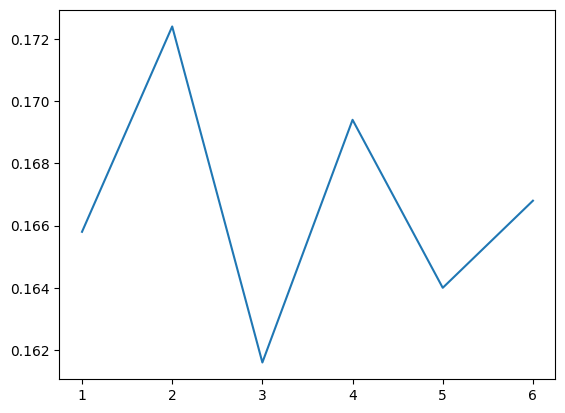

In [ ]:
s.plot()

<Axes: >

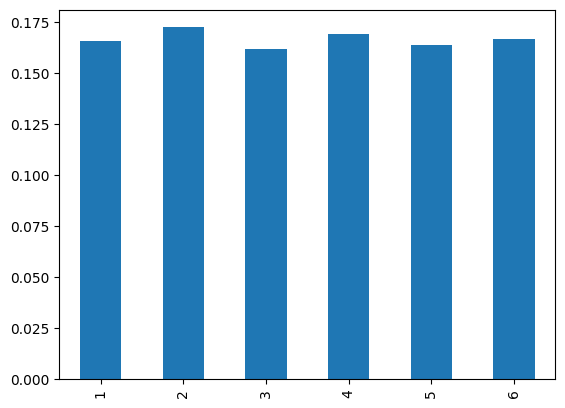

In [ ]:
s.plot(kind='bar')

In [ ]:
for i in range(10000):
  a=random.randint(1,6)
  b = random.randint(1,6)
  l.append(a+b)

In [ ]:
len(l)

20000

In [ ]:
l[:20]

[4, 4, 6, 6, 5, 4, 5, 4, 6, 1, 1, 6, 5, 1, 2, 4, 2, 5, 5, 3]

In [ ]:
p = pd.Series(l)

In [ ]:
p

0        4
1        4
2        6
3        6
4        5
        ..
19995    9
19996    6
19997    7
19998    3
19999    7
Length: 20000, dtype: int64

In [ ]:
p_val=p.value_counts()

In [ ]:
p_val

6     3031
5     2757
4     2538
3     2143
2     2004
7     1661
1     1658
8     1407
9     1155
10     813
11     557
12     276
dtype: int64

In [ ]:
p_sum=p.value_counts().sum()

In [ ]:
p_sum

20000

In [ ]:
p_sort=(p_val/p_sum).sort_index()

In [ ]:
p_sort

1     0.08290
2     0.10020
3     0.10715
4     0.12690
5     0.13785
6     0.15155
7     0.08305
8     0.07035
9     0.05775
10    0.04065
11    0.02785
12    0.01380
dtype: float64

<Axes: >

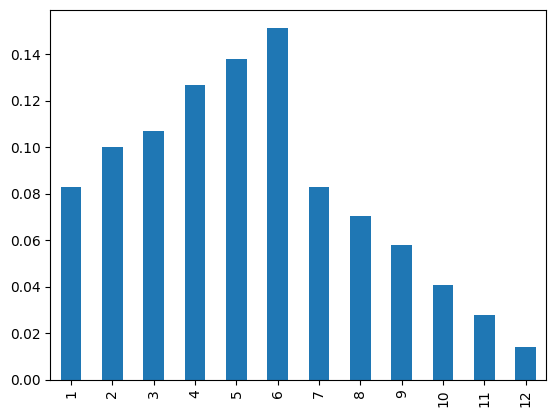

In [ ]:
p_sort.plot(kind='bar')

In [ ]:
import numpy as np


In [ ]:
np.cumsum(p_sort)

1     0.08290
2     0.18310
3     0.29025
4     0.41715
5     0.55500
6     0.70655
7     0.78960
8     0.85995
9     0.91770
10    0.95835
11    0.98620
12    1.00000
dtype: float64

<Axes: >

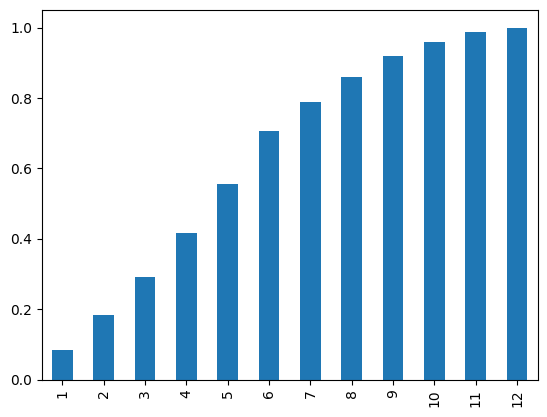

In [ ]:
np.cumsum(p_sort).plot(kind='bar') #f(x)<=

# Parametric Density Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
%matplotlib inline

In [2]:
sample = normal(loc=50, scale=5, size=100)

In [3]:
sample

array([55.82268354, 49.79716934, 60.88759322, 52.29337892, 61.02756204,
       48.85809406, 56.47880257, 39.00827843, 52.49121521, 37.27638771,
       51.67200301, 50.21784942, 56.49737077, 47.6489834 , 43.08756225,
       48.06907121, 42.5198812 , 43.57233748, 39.90534408, 49.7524358 ,
       48.12313459, 47.415362  , 59.69168241, 48.71383076, 39.49525705,
       49.92913674, 45.2788495 , 45.00636582, 54.90406698, 45.88787238,
       57.64597968, 48.65396803, 57.36334083, 54.43121798, 53.42985971,
       55.83596461, 47.92548335, 48.32380981, 41.70513903, 43.24216534,
       51.86087559, 54.20444316, 56.38284465, 54.13410599, 48.55815723,
       59.54602637, 51.71536814, 46.18235724, 47.45044519, 43.96286107,
       49.5800002 , 50.47646198, 53.69853604, 53.29918271, 50.69341748,
       58.20979331, 49.71809662, 52.60252554, 49.85351014, 46.76727071,
       56.72265329, 41.25889532, 52.30490106, 46.73275602, 39.30535661,
       48.99575118, 42.40853595, 54.86321483, 48.97202273, 48.06

In [4]:
sample.mean()

49.88449072613971

In [5]:
sample.std()

5.293441387483442

(array([ 4.,  5.,  7.,  9., 19., 18., 13., 12.,  8.,  5.]),
 array([37.27638771, 39.65150514, 42.02662257, 44.40174001, 46.77685744,
        49.15197487, 51.52709231, 53.90220974, 56.27732717, 58.65244461,
        61.02756204]),
 <BarContainer object of 10 artists>)

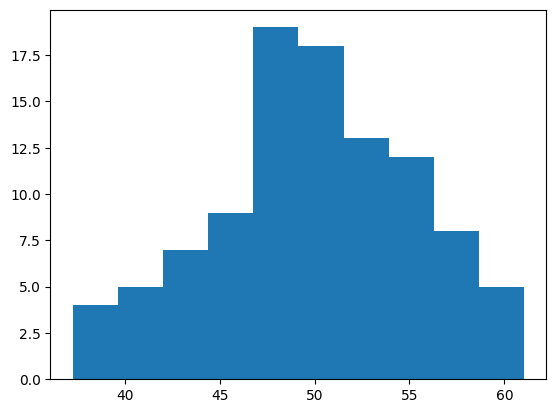

In [6]:
#plot histogram to understad the distribution of data
plt.hist(sample,bins=10)

In [7]:
#calculate sample mean and std deviation
sample_mean=sample.mean()
sample_std=sample.std()

In [8]:
#fit the distribution with the above parameter
from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [9]:
values = np.linspace(sample.min(),sample.max(),100)

In [10]:
values

array([37.27638771, 37.51629856, 37.75620941, 37.99612026, 38.23603111,
       38.47594197, 38.71585282, 38.95576367, 39.19567452, 39.43558537,
       39.67549622, 39.91540708, 40.15531793, 40.39522878, 40.63513963,
       40.87505048, 41.11496134, 41.35487219, 41.59478304, 41.83469389,
       42.07460474, 42.3145156 , 42.55442645, 42.7943373 , 43.03424815,
       43.274159  , 43.51406985, 43.75398071, 43.99389156, 44.23380241,
       44.47371326, 44.71362411, 44.95353497, 45.19344582, 45.43335667,
       45.67326752, 45.91317837, 46.15308922, 46.39300008, 46.63291093,
       46.87282178, 47.11273263, 47.35264348, 47.59255434, 47.83246519,
       48.07237604, 48.31228689, 48.55219774, 48.7921086 , 49.03201945,
       49.2719303 , 49.51184115, 49.751752  , 49.99166285, 50.23157371,
       50.47148456, 50.71139541, 50.95130626, 51.19121711, 51.43112797,
       51.67103882, 51.91094967, 52.15086052, 52.39077137, 52.63068223,
       52.87059308, 53.11050393, 53.35041478, 53.59032563, 53.83

In [11]:
sample.min()

37.276387705869

In [12]:
sample.max()

61.027562040649876

In [13]:
prob=[dist.pdf(value) for value in values]

(array([0.01684127, 0.02105159, 0.02947223, 0.03789286, 0.07999604,
        0.07578573, 0.05473414, 0.05052382, 0.03368255, 0.02105159]),
 array([37.27638771, 39.65150514, 42.02662257, 44.40174001, 46.77685744,
        49.15197487, 51.52709231, 53.90220974, 56.27732717, 58.65244461,
        61.02756204]),
 <BarContainer object of 10 artists>)

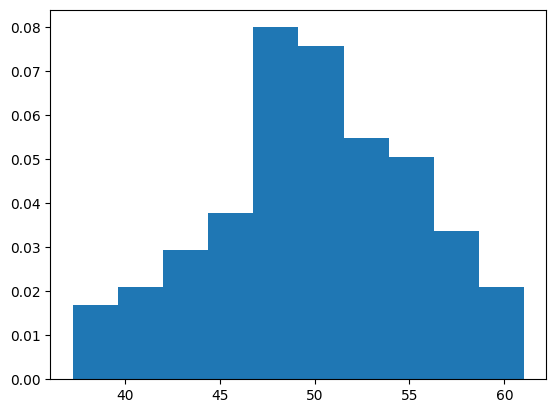

In [14]:
#plot the histogram  and pdf
plt.hist(sample,bins=10,density=True)

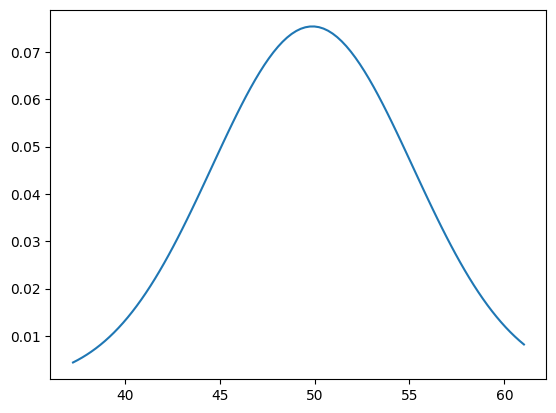

In [15]:
plt.plot(values,prob)

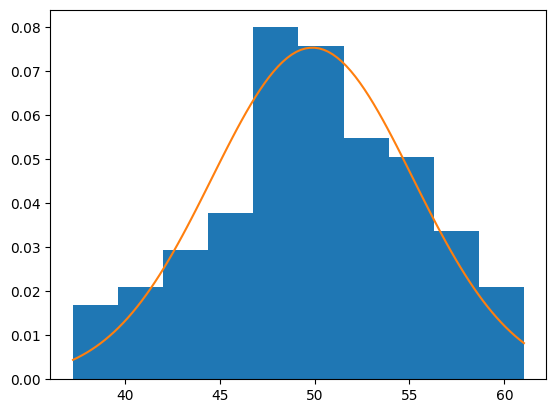

In [16]:
#plot the histogram  and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,prob)

<ipython-input-17-8cd219d00d27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

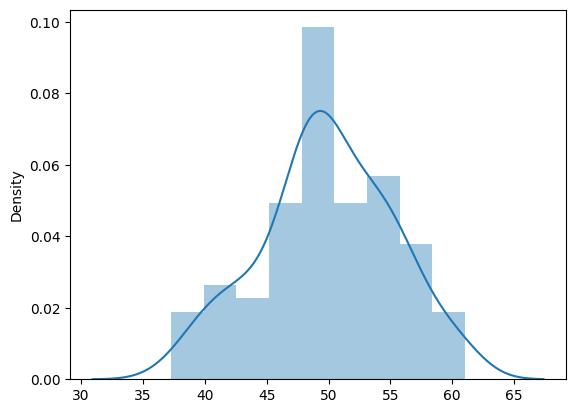

In [17]:
import seaborn as sns
sns.distplot(sample)

#KDE Kernal Density Function

In [19]:
#gnerate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1,sample2))

In [20]:
sample1

array([25.14837769, 16.91404245, 15.40563933, 15.90964346, 13.81185204,
       28.70832764, 20.55325283, 20.41260267, 28.88699664, 19.11380719,
       26.89362607, 11.62789767, 16.01245786, 17.48311116, 10.33148898,
       21.43325108, 27.75063809, 18.28306796, 17.50667751, 19.23505033,
       25.61092075, 20.64554334, 21.57449618, 13.32897825, 19.46394969,
       14.94860676, 25.63784691, 25.67834682, 16.8459971 , 18.14290638,
       21.09169989, 31.41433265, 19.00224518,  7.69051586, 12.48463966,
       19.01815376, 20.41603858, 17.99575255, 25.74375396, 14.86082823,
       12.51350816, 20.69015258, 18.28802654, 19.89589401, 22.35149813,
       23.75100013, 22.58352632, 24.23948389, 23.7523042 , 13.28574742,
       16.00168162, 23.86744645, 24.43965935, 19.35451274, 11.83152628,
       15.23329154, 29.21754104, 13.46660893,  9.40135371, 20.02954243,
       25.1712265 , 21.30178082, 18.26117374, 19.63659045,  9.1928258 ,
       15.8598036 ,  8.25713228, 22.88614983, 23.30022342, 22.43

In [21]:
sample2

array([31.19760474, 41.49446983, 46.2092404 , 39.131576  , 40.28796154,
       40.72598758, 43.28286522, 37.60604645, 38.04331742, 44.69260444,
       32.86841548, 42.89390763, 51.52992406, 47.80725944, 45.63629318,
       47.17943169, 47.38413045, 29.29955124, 42.92589268, 42.38831955,
       36.44879403, 40.76291168, 50.59496231, 41.16387532, 33.88724503,
       40.7315823 , 40.82873966, 43.13410068, 35.35967772, 38.8213382 ,
       33.93689111, 33.60698095, 36.0753583 , 44.57114971, 42.31642719,
       43.45859583, 31.75116609, 40.68959502, 37.7674764 , 37.60038548,
       38.2736449 , 50.38351232, 30.6523375 , 36.82984675, 38.49136148,
       32.51045424, 38.49254917, 42.53852584, 40.76913724, 37.91370737,
       43.97708205, 43.58369868, 42.91814029, 44.90379074, 34.38610959,
       45.06178643, 46.42100593, 39.882551  , 29.51223182, 53.96781597,
       41.79415507, 34.9834295 , 37.15308967, 45.85764202, 40.62326427,
       42.91133418, 38.11801762, 40.02876565, 44.76462141, 36.24

In [27]:
print("Sample1_Mean ",sample1.mean(),'Sample2_Mean',sample2.mean(),'Sample_Mean ',sample.mean())

Sample1_Mean  20.10595891516637 Sample2_Mean 40.122856687572636 Sample_Mean  34.11778735585076


In [28]:
print("Sample1_Std ",sample1.std(),'Sample2_Std',sample2.std(),'Sample_Std ',sample.std())

Sample1_Std  5.011750931534291 Sample2_Std 5.12058443985353 Sample_Std  10.489593174875361


(array([ 3.,  1.,  5.,  4.,  2.,  9., 11.,  9., 15., 16., 23., 19., 22.,
        24., 28., 14., 12., 18., 13., 16., 12., 12., 10., 10.,  7., 18.,
        15., 22., 33., 30., 36., 43., 30., 47., 56., 52., 44., 42., 43.,
        29., 35., 31., 25., 21., 12.,  7.,  8.,  3.,  0.,  3.]),
 array([ 7.51796501,  8.44696203,  9.37595905, 10.30495607, 11.23395308,
        12.1629501 , 13.09194712, 14.02094414, 14.94994116, 15.87893818,
        16.8079352 , 17.73693222, 18.66592924, 19.59492626, 20.52392328,
        21.4529203 , 22.38191731, 23.31091433, 24.23991135, 25.16890837,
        26.09790539, 27.02690241, 27.95589943, 28.88489645, 29.81389347,
        30.74289049, 31.67188751, 32.60088453, 33.52988154, 34.45887856,
        35.38787558, 36.3168726 , 37.24586962, 38.17486664, 39.10386366,
        40.03286068, 40.9618577 , 41.89085472, 42.81985174, 43.74884876,
        44.67784578, 45.60684279, 46.53583981, 47.46483683, 48.39383385,
        49.32283087, 50.25182789, 51.18082491, 52.10982193,

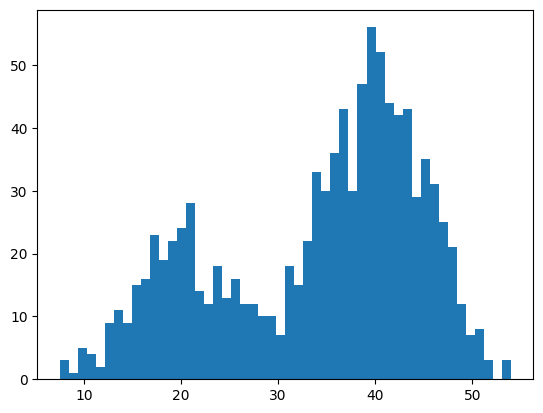

In [30]:
  plt.hist(sample,bins=50)

In [31]:
from sklearn.neighbors import KernelDensity

In [32]:
model = KernelDensity(bandwidth=3,kernel='gaussian')

In [33]:
model

KernelDensity(bandwidth=3)

In [34]:
#conver data into 2D array
sample = sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=3)

In [40]:
import numpy as np
#min - max values sample values

values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values)),1)

In [41]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

sample_score(values) returns the log density estimate of the input sample values.this is because the score_sample() method of KernelDensity class return the logrithm of the probabilty density estimate rathar than actual probability density estimate.

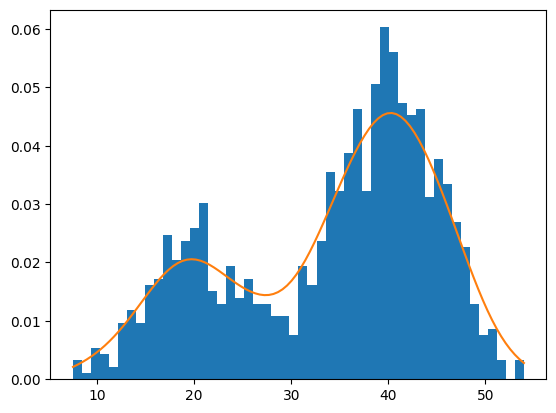

In [42]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)

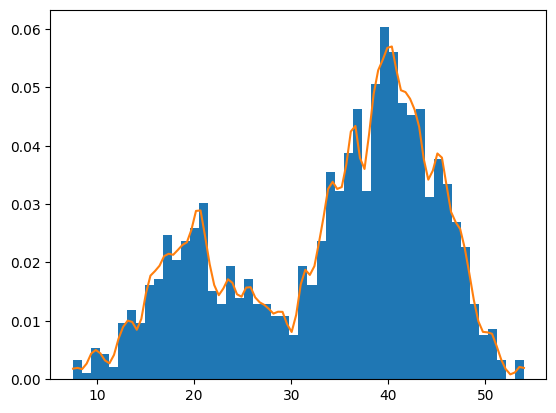

In [46]:
#if bandwidth less
model = KernelDensity(bandwidth=.5,kernel='gaussian')
#conver data into 2D array
sample = sample.reshape((len(sample),1))
model.fit(sample)
#min - max values sample values

values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values)),1)
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)

#kde very peak

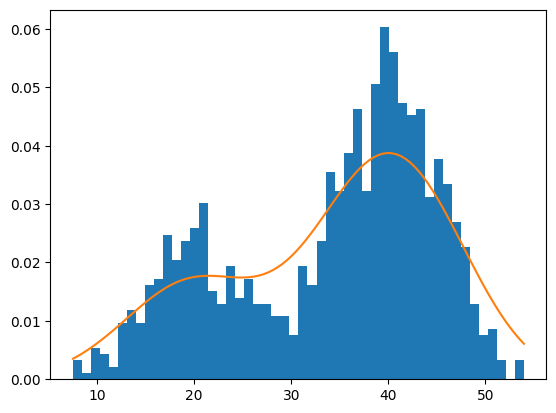

In [47]:
#if bandwidth max

model = KernelDensity(bandwidth=5,kernel='gaussian')
#conver data into 2D array
sample = sample.reshape((len(sample),1))
model.fit(sample)
#min - max values sample values

values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values)),1)
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],probabilities)

#kde very smooth

<Axes: ylabel='Density'>

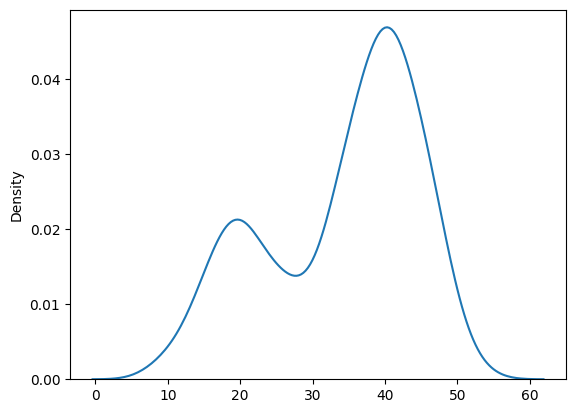

In [48]:
sns.kdeplot(sample.reshape(1000),bw_adjust=1)

<Axes: ylabel='Density'>

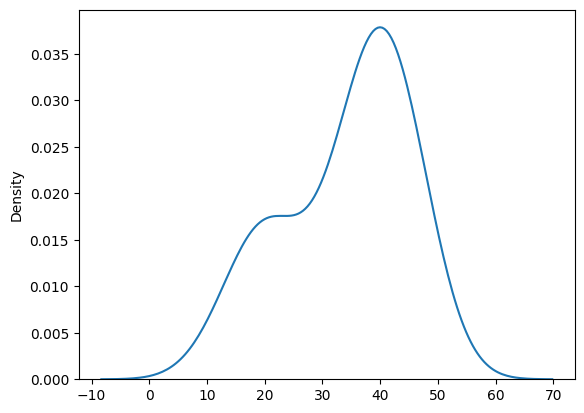

In [49]:
sns.kdeplot(sample.reshape(1000),bw_adjust=2)


<Axes: ylabel='Density'>

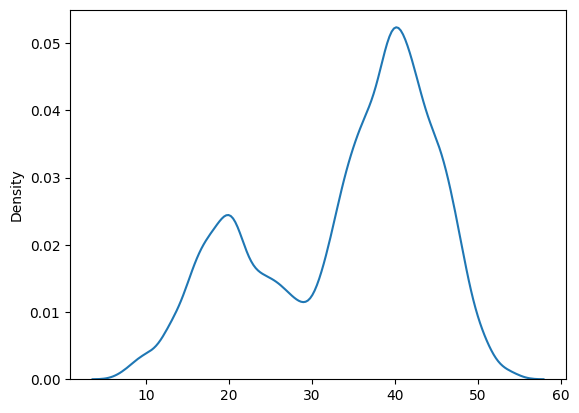

In [50]:
sns.kdeplot(sample.reshape(1000),bw_adjust=.5)
